<a href="https://colab.research.google.com/github/deeji98/Fraud_Detection_Machine_Learning-/blob/main/Fraud_Detection_Data_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from os import SCHED_OTHER
###In this file we go through the different models that we think can be best used for fraud detection
The metrics for measuring the accuracy will be
1. accuracy
2. F-1 Score
3. ROC Curve

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
df =pd.read_csv('Synthetic_encoded_Scaled.csv')

In [ ]:
df.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,0,1,PAYMENT,-0.281560,C1231006815,-0.229810,-0.237622,M1979787155,-0.323814,-0.333411,0,0,3
1,1,1,PAYMENT,-0.294767,C1666544295,-0.281359,-0.285812,M2044282225,-0.323814,-0.333411,0,0,3
2,2,1,TRANSFER,-0.297555,C1305486145,-0.288654,-0.292442,C553264065,-0.323814,-0.333411,1,0,4
3,3,1,CASH_OUT,-0.297555,C840083671,-0.288654,-0.292442,C38997010,-0.317582,-0.333411,1,0,1
4,4,1,PAYMENT,-0.278532,C2048537720,-0.274329,-0.282221,M1230701703,-0.323814,-0.333411,0,0,3


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Synthetic_encoded_Scaled.csv')

# Filter rows where `is_fraud = 0`
is_fraud_0_rows = df[df['isFraud'] == 0]

# Calculate 99% of the `is_fraud = 0` rows
num_to_remove = int(len(is_fraud_0_rows) * 0.99)

# Randomly select 70% of the `is_fraud = 0` rows to remove
indices_to_remove = is_fraud_0_rows.sample(n=num_to_remove, random_state=42).index

# Drop the selected rows from the original DataFrame
df_reduced = df.drop(indices_to_remove)


# Display a summary
print(f"Removed {num_to_remove} rows where 'isFraud = 0'. Remaining rows: {len(df_reduced)}")


Removed 6290862 rows where 'isFraud = 0'. Remaining rows: 71758


In [ ]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71758 entries, 2 to 6362619
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      71758 non-null  int64  
 1   step            71758 non-null  int64  
 2   type            71758 non-null  object 
 3   amount          71758 non-null  float64
 4   nameOrig        71758 non-null  object 
 5   oldbalanceOrg   71758 non-null  float64
 6   newbalanceOrig  71758 non-null  float64
 7   nameDest        71758 non-null  object 
 8   oldbalanceDest  71758 non-null  float64
 9   newbalanceDest  71758 non-null  float64
 10  isFraud         71758 non-null  int64  
 11  isFlaggedFraud  71758 non-null  int64  
 12  type_encoded    71758 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 7.7+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_reduced['type']= label_encoder.fit_transform(df_reduced['type'])
# Display the mapping
type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Type Mapping:", type_mapping)

Type Mapping: {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


In [ ]:
df_reduced.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
X = df_reduced[['step','type_encoded','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].values
y = df_reduced['isFraud'].values
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd

# If y_train is a NumPy array, convert it to a pandas Series
y_train_series = pd.Series(y_train)

# Use value_counts() on the Series
print(y_train_series.value_counts())


0    50833
1     6573
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit kNN
knn = KNeighborsClassifier(n_neighbors=4, metric='manhattan', p=1, weights='distance')
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
print("kNN Classification Report:\n", classification_report(y_test, y_pred_knn))

kNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     12712
           1       0.90      0.80      0.85      1640

    accuracy                           0.97     14352
   macro avg       0.94      0.89      0.91     14352
weighted avg       0.97      0.97      0.97     14352



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit decision tree
tree = DecisionTreeClassifier(min_samples_split=18, min_samples_leaf=7, max_depth=5, criterion='gini')
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12712
           1       0.92      0.89      0.91      1640

    accuracy                           0.98     14352
   macro avg       0.95      0.94      0.95     14352
weighted avg       0.98      0.98      0.98     14352



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit random forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = random_forest.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12712
           1       0.98      0.97      0.98      1640

    accuracy                           0.99     14352
   macro avg       0.99      0.99      0.99     14352
weighted avg       0.99      0.99      0.99     14352



In [ ]:
from sklearn.ensemble import BaggingClassifier

# Initialize and fit bagging classifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), random_state=42, n_estimators=10, bootstrap=False)
bagging.fit(X_train, y_train)

# Predict and evaluate
y_pred_bagging = bagging.predict(X_test)
print("Bagging Classification Report:\n", classification_report(y_test, y_pred_bagging))

Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12712
           1       0.92      0.89      0.91      1640

    accuracy                           0.98     14352
   macro avg       0.95      0.94      0.95     14352
weighted avg       0.98      0.98      0.98     14352



In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Initialize XGBoost Classifier with parameters
xgb_model = xgb.XGBClassifier(
    n_estimators=100,        # Number of trees
    max_depth=4,             # Maximum tree depth
    learning_rate=0.02,      # Learning rate (similar to Gradient Boosting)
    min_child_weight=2,      # Equivalent to min_samples_leaf
    subsample=1.0,           # Use all samples
    colsample_bytree=1.0,    # Use all features
    objective='binary:logistic',  # Objective for binary classification
    random_state=42          # For reproducibility
)

# Perform cross-validation to evaluate performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgboost = xgb_model.predict(X_test)
print("Extream Boosting Classification Report:\n", classification_report(y_test, y_pred_xgboost))

Extream Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12712
           1       0.97      0.89      0.93      1640

    accuracy                           0.98     14352
   macro avg       0.98      0.94      0.96     14352
weighted avg       0.98      0.98      0.98     14352



In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize and fit Neural Network
nn = MLPClassifier(hidden_layer_sizes=(51, 66), solver='adam', activation='relu', max_iter=500, \
                   learning_rate="constant", random_state=42)
nn.fit(X_train, y_train)

# Predict and evaluate
y_pred_nn = nn.predict(X_test)
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     12712
           1       0.93      0.80      0.86      1640

    accuracy                           0.97     14352
   macro avg       0.95      0.90      0.92     14352
weighted avg       0.97      0.97      0.97     14352



In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
print("Quadratic Discriminant Analysis Classification Report:\n", classification_report(y_test, y_pred_qda))

Quadratic Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     12712
           1       0.91      0.62      0.74      1640

    accuracy                           0.95     14352
   macro avg       0.93      0.81      0.86     14352
weighted avg       0.95      0.95      0.95     14352



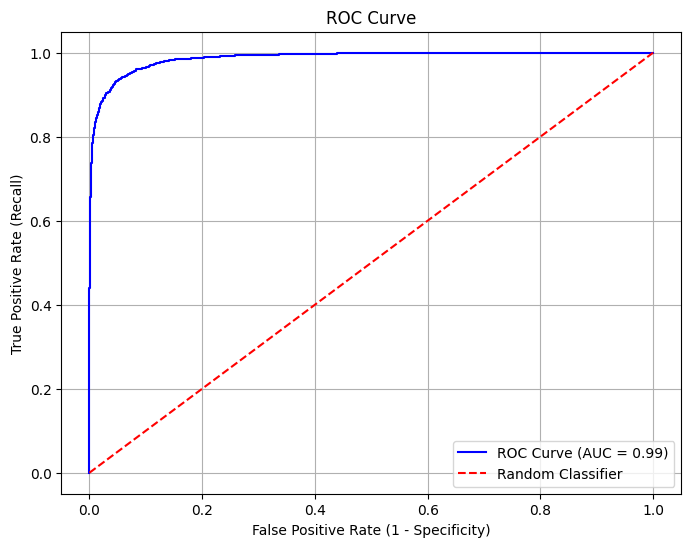

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (1)
y_pred_proba = nn.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

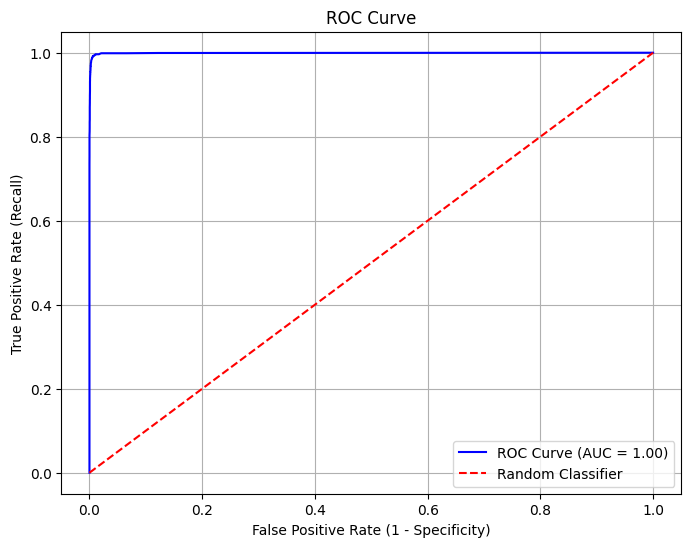

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (1)
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


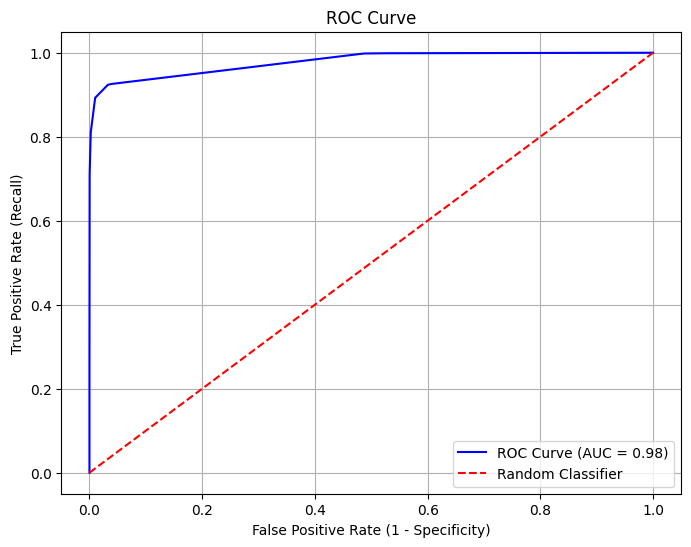

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (1)
y_pred_proba = tree.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


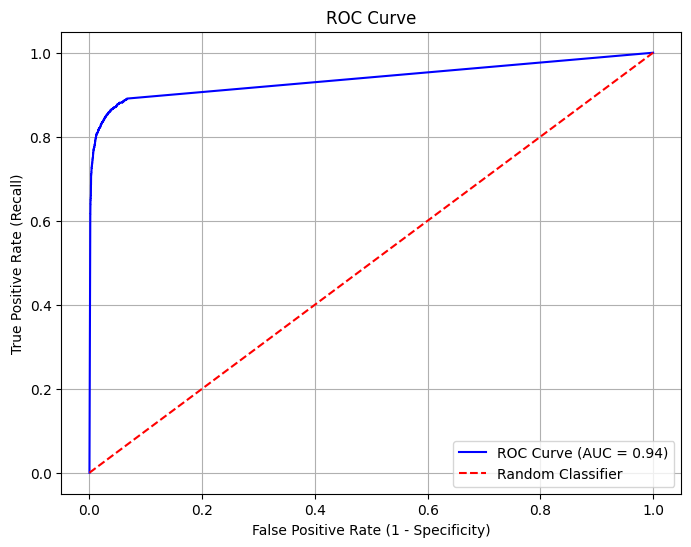

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (1)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


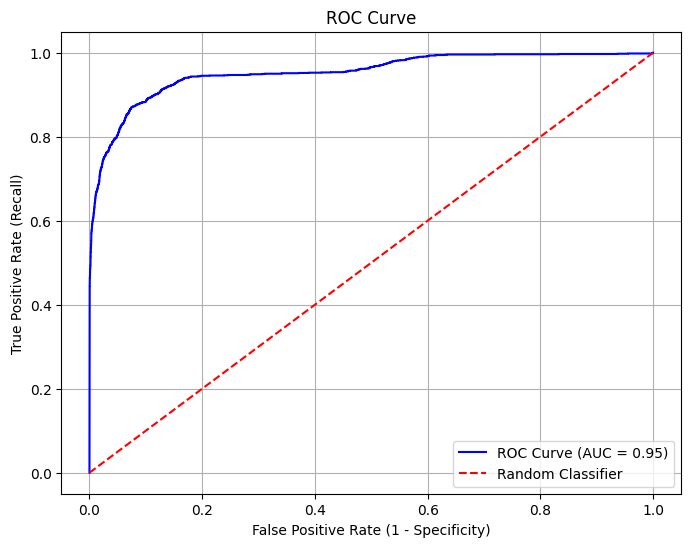

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (1)
y_pred_proba = qda.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)

In [ ]:
import pandas as pd

# If y_train is a NumPy array, convert it to a pandas Series
y_train_series = pd.Series(y_train_o)

# Use value_counts() on the Series
print(y_train_series.value_counts())

0    50833
1    50833
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit kNN
knn = KNeighborsClassifier(n_neighbors=4, metric='manhattan', p=1, weights='distance')
knn.fit(X_train_o, y_train_o)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
print("kNN Classification Report:\n", classification_report(y_test, y_pred_knn))

kNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     12712
           1       0.76      0.86      0.81      1640

    accuracy                           0.95     14352
   macro avg       0.87      0.91      0.89     14352
weighted avg       0.96      0.95      0.95     14352



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_o = DecisionTreeClassifier(min_samples_split=18, min_samples_leaf=7, max_depth=5)
tree_o.fit(X_train_o, y_train_o)

# Predict and evaluate
y_pred_tree_o = tree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree_o))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12712
           1       0.92      0.89      0.91      1640

    accuracy                           0.98     14352
   macro avg       0.95      0.94      0.95     14352
weighted avg       0.98      0.98      0.98     14352



In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_o = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_o.fit(X_train_o, y_train_o)

# Predict and evaluate
y_pred_rf_o = random_forest.predict(X_test)
print("Random Fores Classifier Report(Oversampled):\n", classification_report(y_test,y_pred_rf_o))

Random Fores Classifier Report(Oversampled):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12712
           1       0.98      0.97      0.98      1640

    accuracy                           0.99     14352
   macro avg       0.99      0.99      0.99     14352
weighted avg       0.99      0.99      0.99     14352



#Cross Validation
Using the randomsearch CV to fine tune hyperparameters for random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
param_distributions = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for splitting
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'bootstrap': [True, False]  # Use bootstrap samples
}
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to sample
    scoring='f1',  # Use F1-score as the evaluation metric (or use 'accuracy', 'roc_auc', etc.)
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Print progress
    random_state=42,
    n_jobs=-1  # Use all processors
)
# Fit RandomizedSearchCV on the data
random_search.fit(X_train, y_train)

# Best hyperparameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': True}
Best Cross-Validation Score: 0.9826710687701643


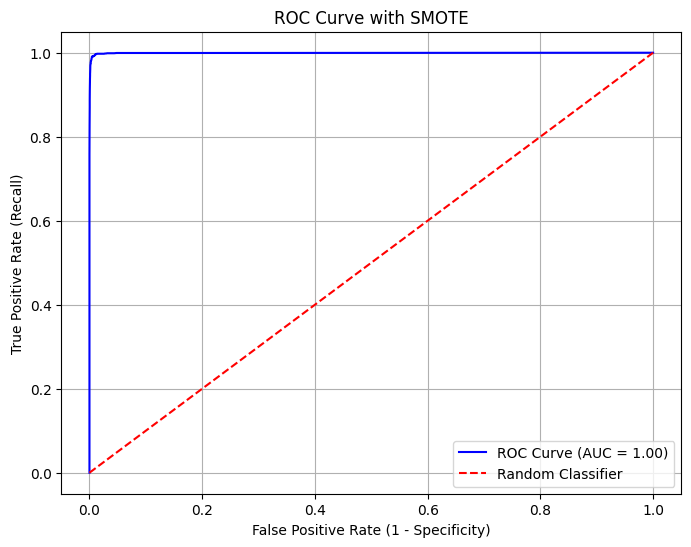

Random Forest Classifier Report(Oversampled):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12712
           1       0.98      0.97      0.98      1640

    accuracy                           0.99     14352
   macro avg       0.99      0.99      0.99     14352
weighted avg       0.99      0.99      0.99     14352



In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df_reduced[['step','type_encoded','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].values
y = df_reduced['isFraud'].values
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy=1,random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the balanced data
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_balanced, y_train_balanced)

# Get predicted probabilities for the positive class (1)
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve with SMOTE')
plt.legend()
plt.grid()
plt.show()

# Predict and evaluate
y_pred_proba = random_forest.predict(X_test)
print("Random Forest Classifier Report(Oversampled):\n", classification_report(y_test,y_pred_rf_o))


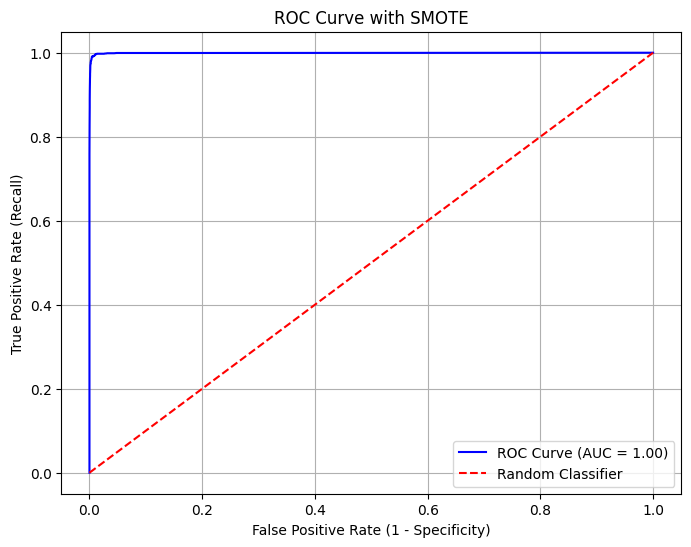

Random Forest Classifier Report (Oversampled):

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12712
           1       0.95      0.99      0.97      1640

    accuracy                           0.99     14352
   macro avg       0.98      0.99      0.98     14352
weighted avg       0.99      0.99      0.99     14352



In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df_reduced[['step', 'type_encoded', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].values
y = df_reduced['isFraud'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the balanced data
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_balanced, y_train_balanced)

# Get predicted probabilities for the positive class (1)
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve with SMOTE')
plt.legend()
plt.grid()
plt.show()

# Predict classes for evaluation
y_pred_rf_o = random_forest.predict(X_test)

# Evaluate performance
print("Random Forest Classifier Report (Oversampled):\n")
print(classification_report(y_test, y_pred_rf_o))
